# Image Classification using image processing 

We will use convex hull algorithm to compute the convex hull of a finite set of points, which will represent images within an extracted images. These images would certainly be bar-plots. 
Convex hull shapes of bar-plots particularly are shaped like a trapezium/rectangle. We ignore the contours which don't classify as these shapes. 
Computing the convex hull means that a non-ambiguous and efficient representation of the required convex shape is constructed.



In [1]:
import cv2
import pytesseract
import imutils
from pathlib import Path
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import xml.etree.ElementTree as ET
from sklearn.ensemble import IsolationForest

In [2]:
# Directory of images to run the code on
img_dir = 'test'
# Directory to save the output images
save_dir = 'out'

In [3]:
def is_contour_bad(c):
    # approximate the contour.
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    # the contour is 'bad' if it is not a 4-sided.
    return not len(approx) != 4

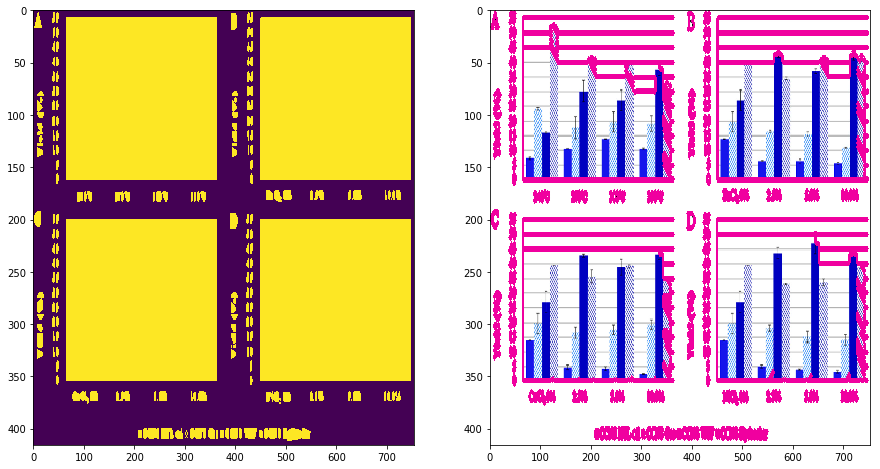

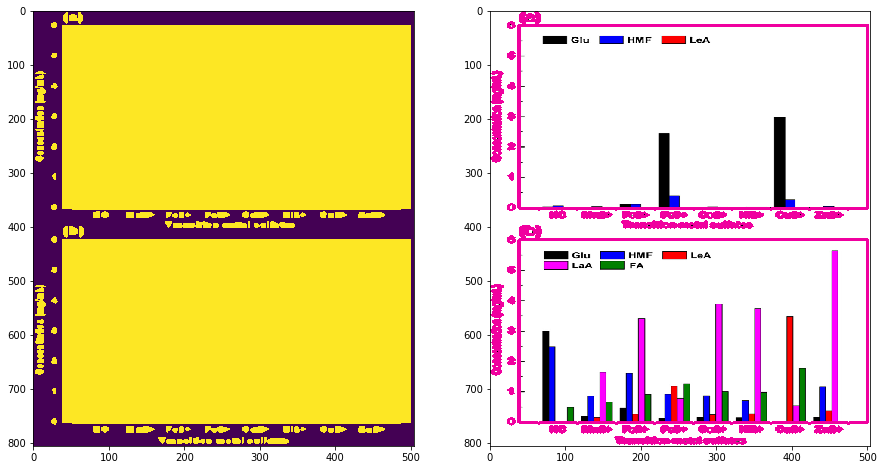

In [7]:
for path in Path(img_dir).iterdir():
    if path.name.endswith('.png') or path.name.endswith('.jpg') or path.name.endswith('.jpeg'):
        filepath = img_dir + "/" + path.name
        image = cv2.imread(filepath)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)[1]
        
        # find external contours in the thresholded image and..
        # allocate memory for the convex hull image.
        cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        hullImage = np.zeros(gray.shape[:2], dtype="uint8")
        
        areaList = []
        xes = []
        # loop over the contours.
        for (i, c) in enumerate(cnts):
            if the contours are bad, ignore those contours.
            if is_contour_bad(c):
                # compute the area of the contour along with the bounding box.
                area = cv2.contourArea(c)
                (x, y, w, h) = cv2.boundingRect(c)

                # compute the convex hull of the contour..
                # then compute the area of the convex hull.

                hull = cv2.convexHull(c)

                hullArea = cv2.contourArea(hull)
#               solidity = area / float(hullArea)

               # draw contours.
                cv2.drawContours(hullImage, [hull], -1, 255, -1)
                cv2.drawContours(image, [c], -1, (240, 0, 159), 3)
                areaList.append([x,y,w,h])
                xes.append(x)
#         print(sorted(areaList))
        rcParams['figure.figsize'] = 15, 8

        fig, ax = plt.subplots(1, 2)
        ax[0].imshow(hullImage, aspect = 'auto')
        ax[1].imshow(image, aspect = 'auto')

 


In [5]:
areaList

[[38, 423, 462, 343], [38, 26, 462, 343]]

In [6]:
# to draw a line classifier wherever we find different images 
for i in set(xes):
    temp1 = []
    for j in areaList:
        if j[0] == i:
            temp1.append(j)
    areaList1 = sorted(temp1,key=lambda l:l[1])
    print(areaList1)
    for iterl in range(len(areaList1)-1):
        y2 = areaList1[iterl][1] + areaList1[iterl][3]
        mid = (areaList1[iterl+1][1] + y2)/2
        print(mid)
        
        
    
        

[[38, 26, 462, 343], [38, 423, 462, 343]]
396.0
